In [37]:
from os import listdir, mkdir
from os.path import join, isfile, isdir, exists, expanduser
from keras.preprocessing import image
from keras.models import load_model, model_from_json
from keras import optimizers, regularizers, models, layers
import matplotlib.pyplot as plt
import numpy as np

### Directory constants

In [38]:
project_dir_name = join('desktop','Esri Project')
data_dir = join(expanduser('~'),  project_dir_name, 'original data 2')
model_path =  join(expanduser('~'),  project_dir_name, 'models', 'map_multi_model_7.h5');
image_path = join(expanduser('~'),  project_dir_name, 'original data 2','freeway', 'Freeway80.jpg');

### Load image

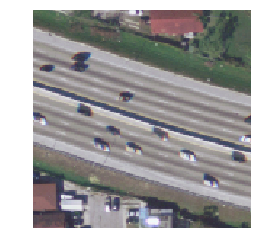

In [39]:
IMAGE_SIZE = 150
img = image.load_img(image_path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
img_tensor = image.img_to_array(img)
img_tensor = img_tensor.reshape((1,) + img_tensor.shape)
img_tensor /= 255. 
plt.imshow(img)
plt.axis('off')
plt.show()

### Predict images with model

In [40]:
classes = [dname for dname in listdir(data_dir) if isdir(join(data_dir, dname))]
model = load_model(model_path)
model.compile(loss='categorical_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])
model.summary()
predictions = model.predict(img_tensor)[0]
max_val = np.amax(predictions)
max_index = np.argmax(predictions)

for idx, pred in enumerate(predictions):
    print('class:' + classes[idx] + ', accuracy:' + str(pred))  

print('\nMax Accuracy:')    
print('class:' + classes[max_index] + ', accuracy:' + str(max_val))  


C:\Users\thom8982\AppData\Local\Continuum\Anaconda3\lib\site-packages\keras\models.py:281: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_5 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 9)                 2313      
Total params: 16,814,409
Trainable params: 2,099,721
Non-trainable params: 14,714,688
_________________________________________________________________
class:agricultural, accuracy:0.0061202
class:chaparral, accuracy:0.00228193
class:denseresidential, accuracy:0.0098836
cla